<a href="https://colab.research.google.com/github/Yon-023/personal_learn_repository/blob/main/NAFNet_demo_on_Image_Debluring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAFNet Online Demo on Image Debluring

## Git clone [NAFNet](https://github.com/megvii-research/NAFNet) repo

In [ ]:
!git clone https://github.com/megvii-research/NAFNet
%cd NAFNet

Cloning into 'NAFNet'...
remote: Enumerating objects: 402, done.
remote: Counting objects: 100% (402/402), done.
remote: Compressing objects: 100% (259/259), done.
remote: Total 402 (delta 201), reused 298 (delta 128), pack-reused 0
Receiving objects: 100% (402/402), 12.22 MiB | 25.13 MiB/s, done.
Resolving deltas: 100% (201/201), done.
/content/NAFNet


## Set up the enviroment

In [ ]:
!pip install -r requirements.txt
!pip install --upgrade --no-cache-dir gdown
!python3 setup.py develop --no_cuda_ext

     |████████████████████████████████| 5.8 MB 4.6 MB/s 
     |████████████████████████████████| 190 kB 42.5 MB/s 
running develop
running egg_info
creating basicsr.egg-info
writing basicsr.egg-info/PKG-INFO
writing dependency_links to basicsr.egg-info/dependency_links.txt
writing top-level names to basicsr.egg-info/top_level.txt
writing manifest file 'basicsr.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'basicsr.egg-info/SOURCES.txt'
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:387: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/basicsr.egg-link (link to .)
Adding basicsr 1.2.0+34622eb to easy-install.pth file

Installed /content/NAFNet
Processing dependencies for basicsr==1.2.0+34622eb
Finished processing dependenci

## Download pretrained models

In [ ]:
import gdown
gdown.download('https://drive.google.com/uc?id=14D4V4raNYIOhETfcuuLI3bGLB-OYIv6X', "./experiments/pretrained_models/", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=14D4V4raNYIOhETfcuuLI3bGLB-OYIv6X
To: /content/NAFNet/experiments/pretrained_models/NAFNet-REDS-width64.pth
100%|██████████| 272M/272M [00:03<00:00, 88.6MB/s]


'./experiments/pretrained_models/NAFNet-REDS-width64.pth'

## Download Demo Image

In [ ]:
gdown.download('https://drive.google.com/uc?id=1kWjrGsAvh4gOA_gn7rB9vnnQVfRINwEn', "demo_input/", quiet=False)
gdown.download('https://drive.google.com/uc?id=1xdfmGUKNDXtnWakyxcGq2nh8m18vHhSI', "demo_input/", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1kWjrGsAvh4gOA_gn7rB9vnnQVfRINwEn
To: /content/NAFNet/demo_input/blurry-reds-0.jpg
100%|██████████| 48.9k/48.9k [00:00<00:00, 11.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xdfmGUKNDXtnWakyxcGq2nh8m18vHhSI
To: /content/NAFNet/demo_input/blurry-reds-1.jpg
100%|██████████| 37.2k/37.2k [00:00<00:00, 10.3MB/s]


'demo_input/blurry-reds-1.jpg'

## Preparation

In [ ]:
import torch

from basicsr.models import create_model
from basicsr.utils import img2tensor as _img2tensor, tensor2img, imwrite
from basicsr.utils.options import parse
import numpy as np
import cv2
import matplotlib.pyplot as plt

def imread(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img
def img2tensor(img, bgr2rgb=False, float32=True):
    img = img.astype(np.float32) / 255.
    return _img2tensor(img, bgr2rgb=bgr2rgb, float32=float32)

def display(img1, img2):
  fig = plt.figure(figsize=(25, 10))
  ax1 = fig.add_subplot(1, 2, 1) 
  plt.title('Input image', fontsize=16)
  ax1.axis('off')
  ax2 = fig.add_subplot(1, 2, 2)
  plt.title('NAFNet output', fontsize=16)
  ax2.axis('off')
  ax1.imshow(img1)
  ax2.imshow(img2)

def single_image_inference(model, img, save_path):
      model.feed_data(data={'lq': img.unsqueeze(dim=0)})

      if model.opt['val'].get('grids', False):
          model.grids()

      model.test()

      if model.opt['val'].get('grids', False):
          model.grids_inverse()

      visuals = model.get_current_visuals()
      sr_img = tensor2img([visuals['result']])
      imwrite(sr_img, save_path)


## Create Model

In [ ]:
opt_path = 'options/test/REDS/NAFNet-width64.yml'
opt = parse(opt_path, is_train=False)
opt['dist'] = False
NAFNet = create_model(opt)

 load net keys <built-in method keys of dict object at 0x7ff57c7055a0>


2022-04-26 16:10:53,211 INFO: Model [ImageRestorationModel] is created.


# Inference and Show results

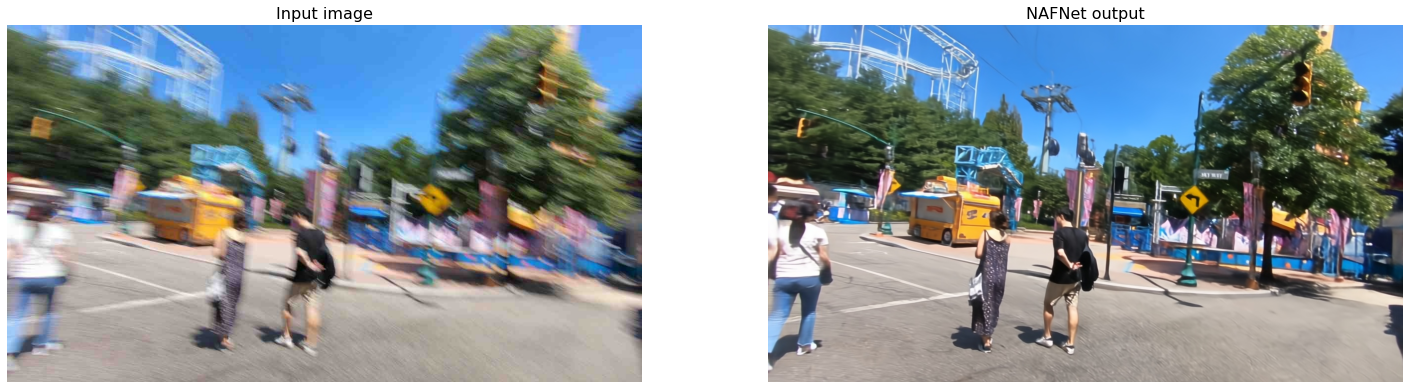

In [ ]:
input_path = 'demo_input/blurry-reds-0.jpg'
output_path = 'demo_output/blurry-reds-0.jpg'

img_input = imread(input_path)
inp = img2tensor(img_input)
single_image_inference(NAFNet, inp, output_path)
img_output = imread(output_path)
display(img_input, img_output)

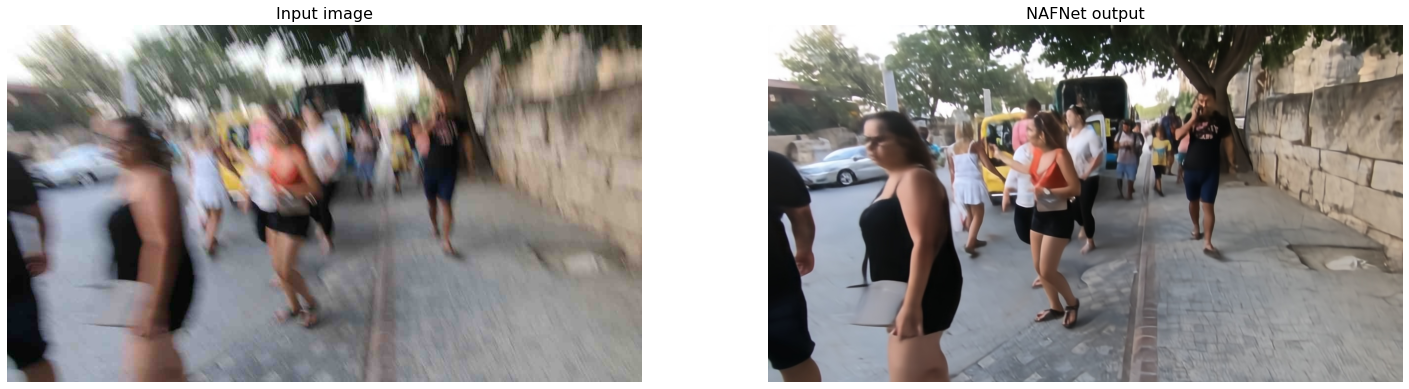

In [ ]:
input_path = 'demo_input/blurry-reds-1.jpg'
output_path = 'demo_output/blurry-reds-1.jpg'

img_input = imread(input_path)
inp = img2tensor(img_input)
single_image_inference(NAFNet, inp, output_path)
img_output = imread(output_path)
display(img_input, img_output)

# Try it on uploaded images

## 1. Upload images

In [ ]:
import os
from google.colab import files
import shutil

upload_folder = 'upload/input'
result_folder = 'upload/output'

if os.path.isdir(upload_folder):
    shutil.rmtree(upload_folder)
if os.path.isdir(result_folder):
    shutil.rmtree(result_folder)
os.makedirs(upload_folder)
os.makedirs(result_folder)

# upload images
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(upload_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

## Inference

In [ ]:
import glob
input_list = sorted(glob.glob(os.path.join(upload_folder, '*')))
for input_path in input_list:
  img_input = imread(input_path)
  inp = img2tensor(img_input)
  output_path = os.path.join(result_folder, os.path.basename(input_path))
  single_image_inference(NAFNet, inp, output_path)

## 3. Visualize (Optional)

In [ ]:
# visualize
input_list = sorted(glob.glob(os.path.join(upload_folder, '*')))
output_list = sorted(glob.glob(os.path.join(result_folder, '*')))
for input_path, output_path in zip(input_list, output_list):
  img_input = imread(input_path)
  img_output = imread(output_path)
  display(img_input, img_output)

## 4. Download results

In [ ]:
# download the result
print(f'Download {result_folder}')
os.system(f'zip -r -j download.zip {result_folder}/*')
files.download("download.zip")